In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#check matplotlib version
matplotlib.__version__

'3.7.0'

In [3]:
# This option ensures charts creatde are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [5]:
#folder path 
path = r'/Users/happygirl/Data Analytics - Immersion/achivement 6'

In [21]:
df = pd.read_csv(os.path.join(path, '6.1', 'boat_data.csv'), index_col = False)

In [22]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


## Exploring relationships

### Correlations

In [24]:
# Create a correlation matrix using pandas
df.corr()

/var/folders/dn/5dslvbys2nn1q0r48v85t0wr0000gn/T/ipykernel_2245/354464612.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year Built,Length,Width,Number of views last 7 days
Year Built,1.000000,0.117290,0.127150,0.024808
Length,0.117290,1.000000,0.873093,-0.135011
Width,0.127150,0.873093,1.000000,-0.157547
Number of views last 7 days,0.024808,-0.135011,-0.157547,1.000000


/var/folders/dn/5dslvbys2nn1q0r48v85t0wr0000gn/T/ipykernel_2245/466011327.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(df.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to


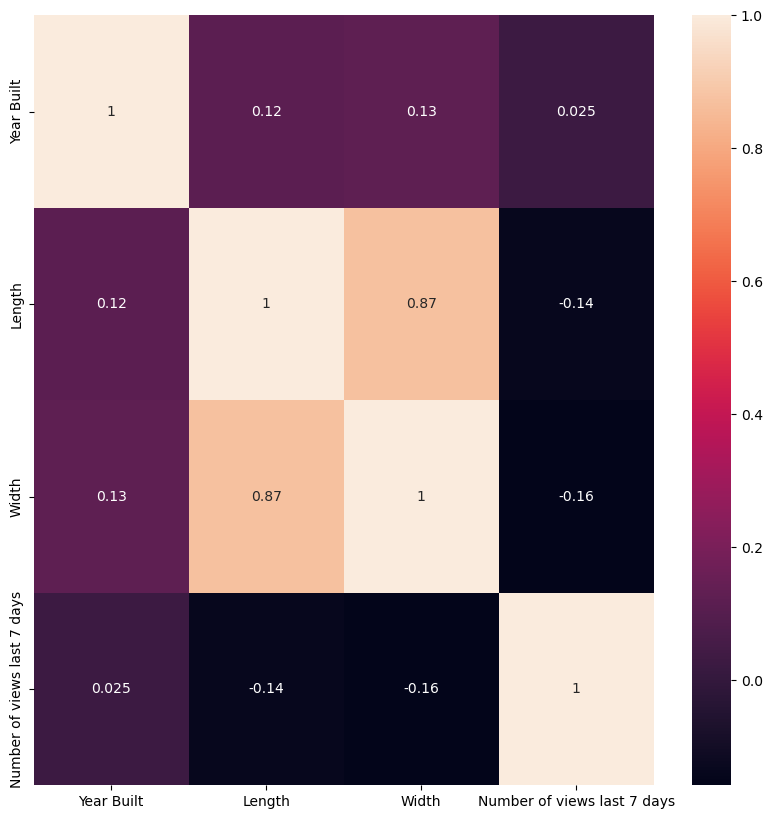

In [25]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

A correlation heatmap was made to compare how the variables of the Yacht are correlated to each other, with strong correlation only between Length and Width.

### Scatterplots

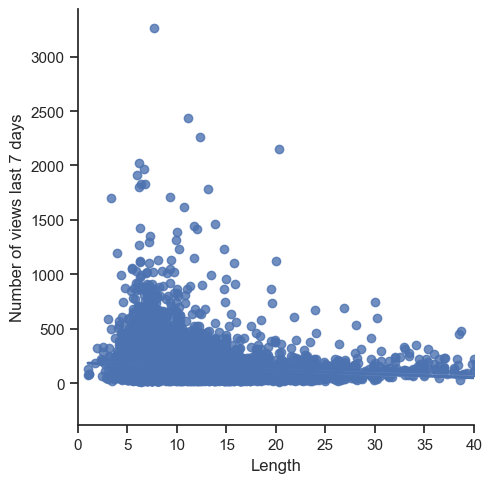

In [74]:
# Create lmplot and get the Axes object
g1 = sns.lmplot(x="Length", y="Number of views last 7 days", data=df)

# Set x-axis range
g1.set(xlim=(0, 40))

With scatterplot I wanted to see the relationship between the length of the Yachts and the number of views in the 7 day range. We can see a good accumulation of views between the 5-10 meter length; leading to answer that one of the most viewed Yachts are between 5-10 meters in length.

### Pair Plots

In [38]:
# Keep only the variables you want to use in the pair plot

sub=df[['Length', 'Width', 'Number of views last 7 days', 'Year Built']]

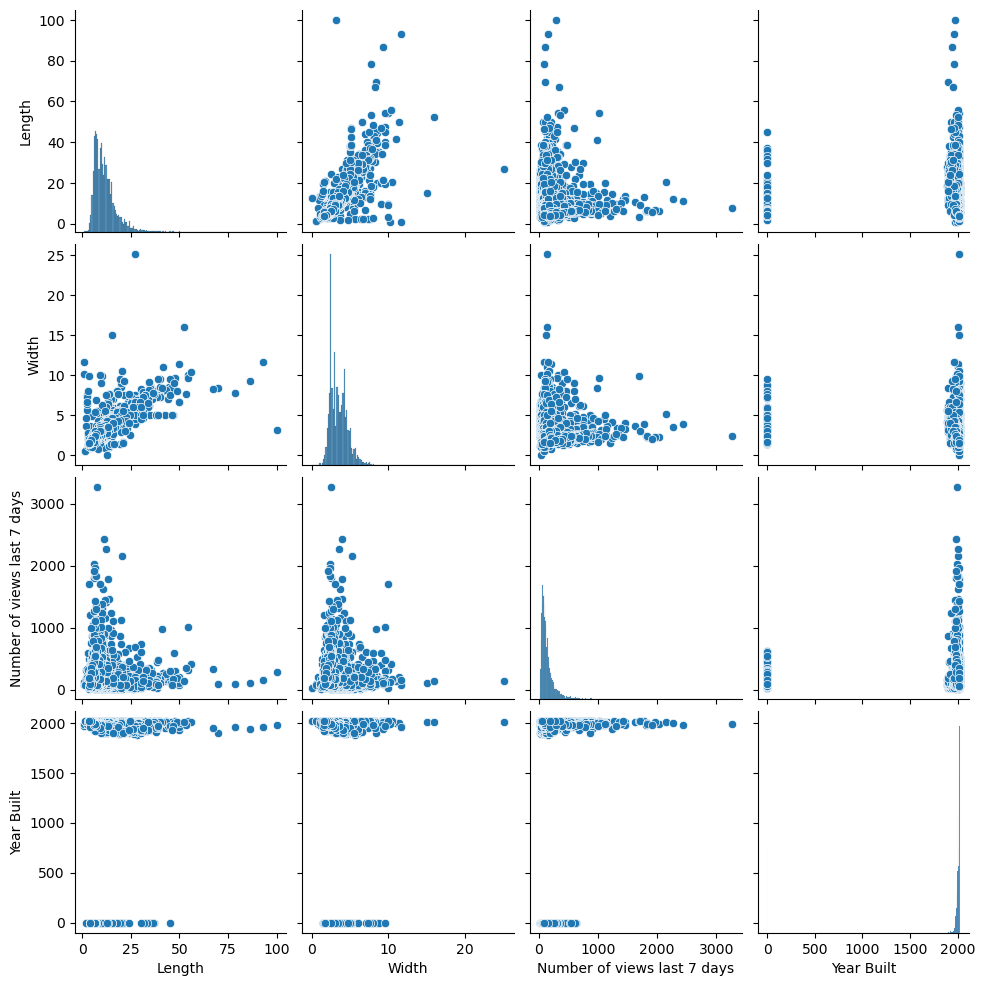

In [39]:
# Create a pair plot 

g = sns.pairplot(sub)

The correlations between Number of views last 7 days and Length/Width are the best visuals.

### Categorical Plot

<Axes: xlabel='Length', ylabel='Count'>

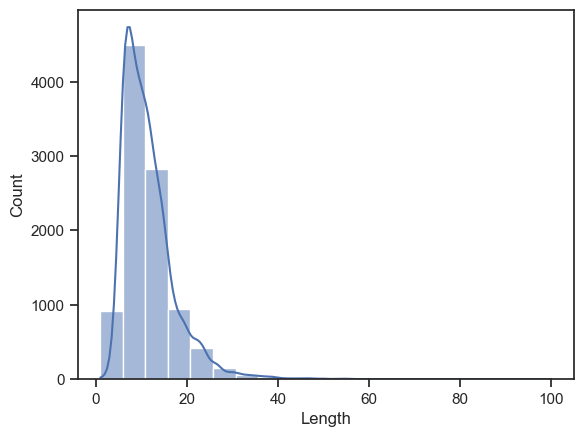

In [58]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution
sns.histplot(sub['Length'], bins = 20, kde = True)

In [49]:
sub.loc[(sub['Length'] > 15) & (sub['Length'] <= 40), 'Length category'] = 'Above Average Length'

In [50]:
sub.loc[(sub['Length'] > 5) & (sub['Length'] <= 10), 'Length category'] = 'Average Length'

In [59]:
sub.loc[(sub['Length'] > 0) & (sub['Length'] <= 5), 'Length category'] = 'Below Average Length'

In [60]:
sub['Length'].value_counts(dropna = False)

12.00    109
9.00     107
11.00     96
10.00     96
6.50      82
        ... 
42.58      1
23.30      1
13.07      1
26.63      1
3.60       1
Name: Length, Length: 1613, dtype: int64

In [53]:
sub.columns

Index(['Length', 'Width', 'Number of views last 7 days', 'Year Built',
       'Length category'],
      dtype='object')

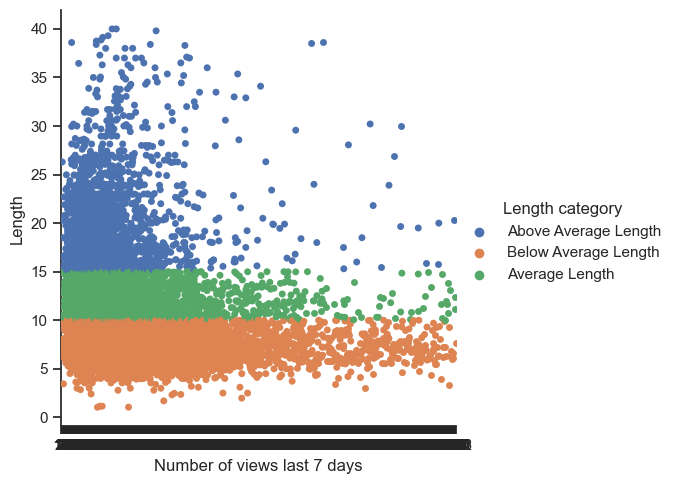

In [61]:
# Create a categorical plot in seaborn using the length categories created above

sns.set(style="ticks")
g = sns.catplot(x="Number of views last 7 days", y="Length", hue="Length category", data=sub)

We can see a good accumulation of views between the 5-10 meter length; leading to answer that one of the most viewed Yachts are between 5-10 meters in length.

In [62]:
# Let's take a look at the data again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


In [63]:
df['Currency'] = df.loc[:,'Price'].str.slice(0,3)
df['Price'] = df['Price'].str.replace(r'[A-Z\D\W]', '')
df.head()

/var/folders/dn/5dslvbys2nn1q0r48v85t0wr0000gn/T/ipykernel_2245/3459706047.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Price'] = df['Price'].str.replace(r'[A-Z\D\W]', '')


,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR
2,3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF
3,25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR


In [65]:
df['Currency'].unique()

array(['CHF', 'EUR', 'DKK', 'Â£ '], dtype=object)

In [69]:
most_viewed = df[df['Number of views last 7 days'] > 1800].sort_values('Number of views last 7 days', ascending=False)

In [70]:
most_viewed

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency
9580,14900,Motor Yacht,Bayliner power boats,"Used boat,Unleaded",1992,7.70,2.46,Plastic,Switzerland Â» Le Landeron (NE),3263,CHF
8723,35000,Hardtop,Princess power boats,"Used boat,Diesel",1979,11.12,3.88,GRP,Switzerland Â» Neuenburgersee Â» Hauterive,2432,CHF
6211,125900,"Bowrider,Motor Yacht,Sport Boat",Windy power boats,"Used boat,Diesel",2002,12.35,3.48,GRP,Switzerland Â» Lago Maggiore Â» 6600 Locarno,2261,CHF
3700,949000,Hardtop,Pershing power boats,"Used boat,Diesel",2009,20.30,5.20,GRP,Neustadt in Holstein (Ostsee),2154,EUR
308,19900,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1993,6.14,2.34,Plastic,Switzerland Â» Murtensee Â» Avenches,2026,CHF
894,48500,Cabin Boat,Viper power boats,"Used boat,Unleaded",2014,6.65,2.30,GRP,Switzerland Â» Horn,1970,CHF
9878,4999,"Sport Boat,Wakeboard/Wakesurf,Water ski",Tullio Abbate power boats,"Used boat,Unleaded",1980,6.00,2.10,GRP,Switzerland Â» Lake of Zurich Â» Rafz,1917,CHF
8684,36000,Sport Boat,Correct Craft power boats,"Used boat,Unleaded",2005,6.40,2.31,GRP,Switzerland Â» Lago Maggiore Â» Ticino,1834,CHF
9843,6500,Sport Boat,Baha power boats,"Used boat,Unleaded",1995,6.80,2.38,GRP,Thun,1831,CHF
35,3800,Cabin Boat,Draco power boats,"Used boat,Unleaded",1980,6.20,2.45,GRP,Switzerland Â» Walensee Â» Walenstadt,1804,CHF


### Questions:

#### Is it the most expensive boats that get the most reviews?

Not necessarily, the Top 10 boats in number of views have prices between CHF 3,800 and CHF 14,900, while the Top 10 most expensive boats are above EUR 14,950,000 (1 Swiss Franc equals 1,03 Euro - 16 May, 01:45 UTC · Disclaimer).


#### How many views did the top viewed boat receive in the last 7 days?

The Top 10 boats in number of views have between 1804 and 3263 views.


#### What are the characteristics of the most viewed boat listings in the last 7 days?

Based on the data analysis, boats between 5-10 meters in length appear to be the most popular among potential buyers, receiving the highest number of views.

### Hypothesis

#### There is no correlation between the price of the boats and the number of the views, but with the boat's length. 

#### There are boats with the most views, with a large gap difference from the others. 
 

In [72]:
#export visualizations
corr.figure.savefig(r'/Users/happygirl/Data Analytics - Immersion/achivement 6/Boat Sales Analysis/04 Analysis/Visualizations/corrheatmap.png')

In [75]:
g1.figure.savefig(r'/Users/happygirl/Data Analytics - Immersion/achivement 6/Boat Sales Analysis/04 Analysis/Visualizations/scattlengthviews.png')

In [76]:
g.figure.savefig(r'/Users/happygirl/Data Analytics - Immersion/achivement 6/Boat Sales Analysis/04 Analysis/Visualizations/lengthcategory.png')

In [77]:
#export final dataset
df.to_csv(r'/Users/happygirl/Data Analytics - Immersion/achivement 6/Boat Sales Analysis/02 Data/Prepared Data/df62.pkl')